RandomForest and Linear Regression




In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
%matplotlib inline


In [ ]:
#Reading .csv file
df=pd.DataFrame() # creating a panda dataframe
df =  pd.read_csv("/content/SCM-2020.csv",index_col='Date',parse_dates=True)
df.index.freq='MS' #frequency of data is monthly 

In [ ]:
#Exploring the Given Data
df.head() #shows first five rows of dataset


,sales
Date,
2007-01-01,589
2007-02-01,561
2007-03-01,640
2007-04-01,656
2007-05-01,727


In [ ]:
print('Total number of rows =',len(df)) 
print('Types of data used:\n',df.dtypes)

Total number of rows = 168
Types of data used:
 sales    int64
dtype: object


Text(0, 0.5, 'Sales in Lakhs of litres')

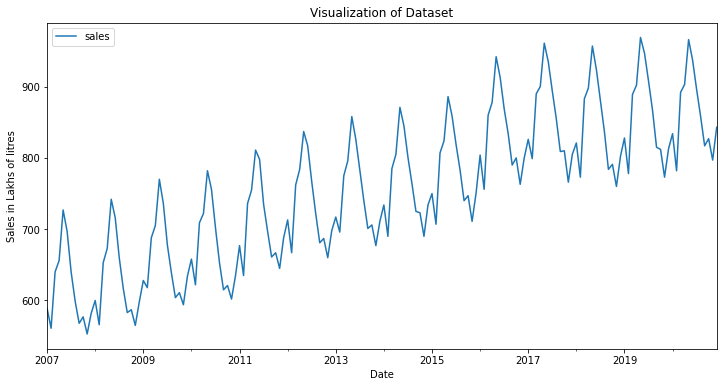

In [ ]:
#plotting data
df.columns=['sales']
df.plot(figsize=(12,6))
plt.title("Visualization of Dataset")
plt.xlabel("Date")
plt.ylabel("Sales in Lakhs of litres")

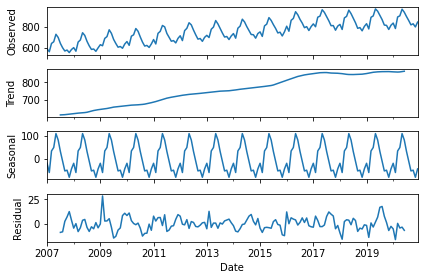

In [ ]:
#creating subplots to check trend,seasonality and residual
from statsmodels.tsa.seasonal import seasonal_decompose #importing statsmodels library
subplots = seasonal_decompose(df['sales']) #creating subplots
subplots.plot();

In [ ]:
#checking for stationarity in the data Using Dicky Fuller Test
from statsmodels.tsa.stattools import adfuller
def ADF(dataset):
     result = adfuller(dataset, autolag = 'AIC') 
     print('P value: %f' % result[1])
               
ADF(df['sales'])#calling the function
#Dicky Fuller test based on the hypothesis If p< 0.05 ;
#Data is stationary If p>0.05; Data is not stationary

P value: 0.627427


In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("ADF : ",dftest[0])
     print("P-Value : ", dftest[1])
     print("Number Of Lags : ", dftest[2])
     print("Number Of Observations Used For ADF Regression:",      dftest[3])
     print("Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['sales'])

ADF :  -1.3038115874221299
P-Value :  0.6274267086030314
Number Of Lags :  13
Number Of Observations Used For ADF Regression: 154
Critical Values :
	 1% :  -3.473542528196209
	 5% :  -2.880497674144038
	 10% :  -2.576878053634677


As P is greater than 0.05 it shows that data is not stationary in order to make the data stationary we can perform differencing operation to make the data stationary.Shifting data by twelve as we can observe repeating pattern after 12 months

In [ ]:
df['Sales_prevMonth']=df['sales'].shift(+1) #shifting data by 1 cell
df['Sales_2Monthsback']=df['sales'].shift(+2)
df['Sales_3Monthsback']=df['sales'].shift(+3)
df['Sales_4Monthsback']=df['sales'].shift(+4)
df['Sales_5Monthsback']=df['sales'].shift(+5)
df['Sales_6Monthsback']=df['sales'].shift(+6)
df['Sales_7Monthsback']=df['sales'].shift(+7)
df['Sales_8Monthsback']=df['sales'].shift(+8)
df['Sales_9Monthsback']=df['sales'].shift(+9)
df['Sales_10Monthsback']=df['sales'].shift(+10)
df['Sales_11Monthsback']=df['sales'].shift(+11)
df['Sales_12Monthsback']=df['sales'].shift(+12)
df=df.dropna()
df.head()


,sales,Sales_prevMonth,Sales_2Monthsback,Sales_3Monthsback,Sales_4Monthsback,Sales_5Monthsback,Sales_6Monthsback,Sales_7Monthsback,Sales_8Monthsback,Sales_9Monthsback,Sales_10Monthsback,Sales_11Monthsback,Sales_12Monthsback
Date,,,,,,,,,,,,,
2008-01-01,600,582.0,553.0,577.0,568.0,599.0,640.0,697.0,727.0,656.0,640.0,561.0,589.0
2008-02-01,566,600.0,582.0,553.0,577.0,568.0,599.0,640.0,697.0,727.0,656.0,640.0,561.0
2008-03-01,653,566.0,600.0,582.0,553.0,577.0,568.0,599.0,640.0,697.0,727.0,656.0,640.0
2008-04-01,673,653.0,566.0,600.0,582.0,553.0,577.0,568.0,599.0,640.0,697.0,727.0,656.0
2008-05-01,742,673.0,653.0,566.0,600.0,582.0,553.0,577.0,568.0,599.0,640.0,697.0,727.0


In [ ]:
#Importing Linear Regression Function
from sklearn.linear_model import LinearRegression
linearReression_model=LinearRegression()

In [ ]:
#Preparing the dataset to input into the model
x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y=df['Sales_prevMonth'],df['Sales_2Monthsback'],df['Sales_3Monthsback'],df['Sales_4Monthsback'],df['Sales_5Monthsback'],df['Sales_6Monthsback'],df['Sales_7Monthsback'],df['Sales_8Monthsback'],df['Sales_9Monthsback'],df['Sales_10Monthsback'],df['Sales_11Monthsback'],df['Sales_12Monthsback'],df['sales']
x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(x8),np.array(x9),np.array(x10),np.array(x11),np.array(x12),np.array(y)
x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),x6.reshape(-1,1),x7.reshape(-1,1),x8.reshape(-1,1),x9.reshape(-1,1),x10.reshape(-1,1),x11.reshape(-1,1),x12.reshape(-1,1),y.reshape(-1,1)
concated_x=np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12),axis=1)

In [ ]:
concated_x.shape,y.shape

((156, 12), (156, 1))

In [ ]:
concated_x

array([[582., 553., 577., ..., 640., 561., 589.],
       [600., 582., 553., ..., 656., 640., 561.],
       [566., 600., 582., ..., 727., 656., 640.],
       ...,
       [817., 858., 896., ..., 813., 773., 812.],
       [827., 817., 858., ..., 834., 813., 773.],
       [797., 827., 817., ..., 782., 834., 813.]])

In [ ]:
X_train,X_test,y_train,y_test=concated_x[:-36],concated_x[-36:],y[:-36],y[-36:] #splitting the dataset
X_train.shape,X_test.shape

((120, 12), (36, 12))

In [ ]:
y_test

array([[821],
       [773],
       [883],
       [898],
       [957],
       [924],
       [881],
       [837],
       [784],
       [791],
       [760],
       [802],
       [828],
       [778],
       [889],
       [902],
       [969],
       [947],
       [908],
       [867],
       [815],
       [812],
       [773],
       [813],
       [834],
       [782],
       [892],
       [903],
       [966],
       [937],
       [896],
       [858],
       [817],
       [827],
       [797],
       [843]])

In [ ]:
linearReression_model.fit(X_train,y_train)

LinearRegression()

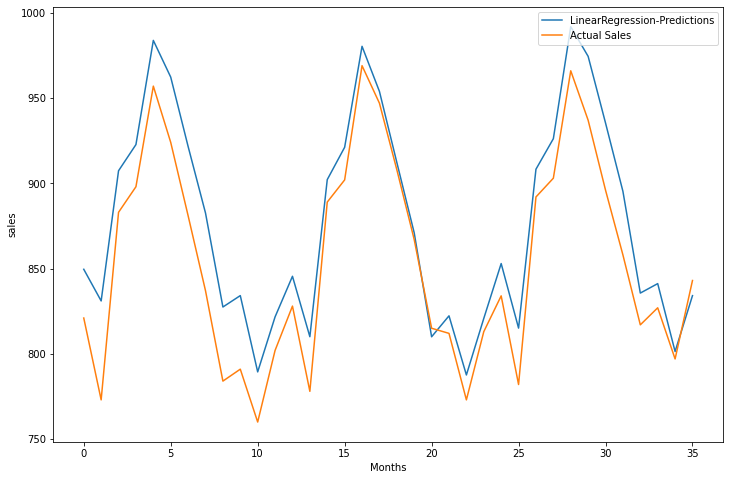

In [ ]:
linear_predictions=linearReression_model.predict(X_test)
results=linearReression_model.fit(X_test,y_test)
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(linear_predictions,label='LinearRegression-Predictions')
plt.plot(y_test,label='Actual Sales')
plt.xlabel("Months")
plt.ylabel("sales")
plt.legend(loc="upper right")
plt.show()

In [ ]:
RMSE_linear=sqrt(mean_squared_error(linear_predictions,y_test))
MAE_linear = mean_absolute_error(linear_predictions,y_test)
MAPE_linear=np.mean(np.abs((y_test - linear_predictions) / y_test)) * 100
print('Mean Squared Error for Linear Regression Model is:',RMSE_linear)
print('Mean Absolute Deviation for Linear Regression Model is:',MAE_linear)
print('MAPE for Linear Regression Model is:',MAPE_linear)


Mean Squared Error for Linear Regression Model is: 27.2352279735167
Mean Absolute Deviation for Linear Regression Model is: 23.503064563007342
MAPE for Linear Regression Model is: 2.780696507369314


In [ ]:
linear_predictions

array([[849.58279005],
       [831.02162564],
       [907.36460563],
       [922.72081939],
       [983.8220215 ],
       [962.28002701],
       [921.61077906],
       [882.58148289],
       [827.45817984],
       [834.14988276],
       [789.40398094],
       [821.67617763],
       [845.47938405],
       [810.04139277],
       [902.15933471],
       [921.13455701],
       [980.34691088],
       [953.91183876],
       [912.25947454],
       [870.93448181],
       [809.99904852],
       [822.28809273],
       [787.60499175],
       [820.76314621],
       [852.9487092 ],
       [815.08964081],
       [908.27436789],
       [926.16813735],
       [991.86148854],
       [974.46384739],
       [935.38038039],
       [895.28567151],
       [835.63501284],
       [841.18038734],
       [801.35153308],
       [834.12578111]])